In [112]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/train_data.csv
/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/sample_outputs.csv
/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/test_data_with_inputs.csv


In [113]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error
from sklearn import metrics

## Data Preprocessing
* Creating Pandas Dataframes
* Checking the datatypes
* Finding Data Patterns through graphical representation 
* Finding correlations

In [114]:
mov_train = pd.read_csv('/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/train_data.csv')
mov_test = pd.read_csv('/kaggle/input/imdb-prediction-by-123-of-ai-weekend-hackathon/test_data_with_inputs.csv')
print(mov_train.shape,mov_test.shape)

(4225, 28) (470, 27)


In [115]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4225 entries, 0 to 4224
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   s_no                       4225 non-null   int64  
 1   director_name              4225 non-null   object 
 2   duration                   4225 non-null   float64
 3   director_facebook_likes    4225 non-null   float64
 4   actor_3_facebook_likes     4225 non-null   float64
 5   actor_2_name               4225 non-null   object 
 6   actor_1_facebook_likes     4225 non-null   float64
 7   gross                      4225 non-null   float64
 8   genres                     4225 non-null   object 
 9   actor_1_name               4225 non-null   object 
 10  movie_title                4225 non-null   object 
 11  num_voted_users            4225 non-null   int64  
 12  cast_total_facebook_likes  4225 non-null   int64  
 13  actor_3_name               4225 non-null   objec

In [116]:
mov_train['genres']

0                   Crime|Drama|Mystery|Thriller
1                          Drama|Fantasy|Romance
2                                  Drama|History
3                                  Drama|Romance
4                                Horror|Thriller
                          ...                   
4220    Action|Adventure|Fantasy|Horror|Thriller
4221    Action|Adventure|Fantasy|Sci-Fi|Thriller
4222                                       Drama
4223           Adventure|Animation|Comedy|Family
4224                               Horror|Sci-Fi
Name: genres, Length: 4225, dtype: object

In [117]:
mov_train['genres'] = mov_train['genres'].str.split('|')
mov_train['genre_1'] = mov_train['genres'].apply(lambda x: x[0])
mov_train['genre_2'] = mov_train['genres'].apply(lambda x : x[1] if len(x) > 1 else x[0])
mov_train['genre_1'],mov_train[ 'genre_2']


(0           Crime
 1           Drama
 2           Drama
 3           Drama
 4          Horror
           ...    
 4220       Action
 4221       Action
 4222        Drama
 4223    Adventure
 4224       Horror
 Name: genre_1, Length: 4225, dtype: object,
 0           Drama
 1         Fantasy
 2         History
 3         Romance
 4        Thriller
           ...    
 4220    Adventure
 4221    Adventure
 4222        Drama
 4223    Animation
 4224       Sci-Fi
 Name: genre_2, Length: 4225, dtype: object)

In [118]:
mov_train.describe()

,s_no,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score
count,4225.000000,4225.000000,4225.000000,4225.000000,4225.000000,4.225000e+03,4.225000e+03,4225.000000,4225.000000,4.225000e+03,4225.000000,4225.000000,4225.000000,4225.00000,4.225000e+03,4.225000e+03,4225.000000,4225.000000
mean,2453.915740,108.593136,707.537515,655.863905,6817.903195,4.604866e+07,8.841292e+04,10046.912426,1.366154,3.972844e+07,2002.164024,1698.986272,2.126277,7838.04071,-6.320218e+06,6.671254e+03,0.896648,6.427905
std,1436.634285,22.569440,2835.019787,1670.677214,15440.494498,6.440872e+07,1.419197e+05,18620.002492,2.033256,2.126622e+08,12.325422,4152.350628,0.666806,19911.91734,2.157819e+08,1.132255e+05,1.036943,1.105537
min,0.000000,14.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,2.180000e+02,1927.000000,0.000000,1.180000,0.00000,-5.235058e+08,-9.998610e+01,0.037037,1.600000
25%,1211.000000,94.000000,7.000000,141.000000,634.000000,8.070311e+06,1.066700e+04,1495.000000,0.000000,8.000000e+06,1999.000000,294.000000,1.850000,0.00000,-2.420000e+07,-6.202187e+01,0.384298,5.800000
50%,2432.000000,104.000000,51.000000,384.000000,1000.000000,2.600591e+07,3.790100e+04,3218.000000,1.000000,2.000000e+07,2005.000000,613.000000,2.350000,177.00000,-4.203192e+06,-2.007999e+01,0.625000,6.600000
75%,3678.000000,118.000000,209.000000,642.000000,11000.000000,5.454052e+07,1.018990e+05,14421.000000,2.000000,4.000000e+07,2010.000000,925.000000,2.350000,5000.00000,9.810821e+06,1.061175e+02,1.098121,7.200000
max,5042.000000,330.000000,22000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,1.221550e+10,2016.000000,137000.000000,16.000000,349000.00000,1.221330e+10,5.555456e+06,25.000000,9.300000


/opt/conda/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


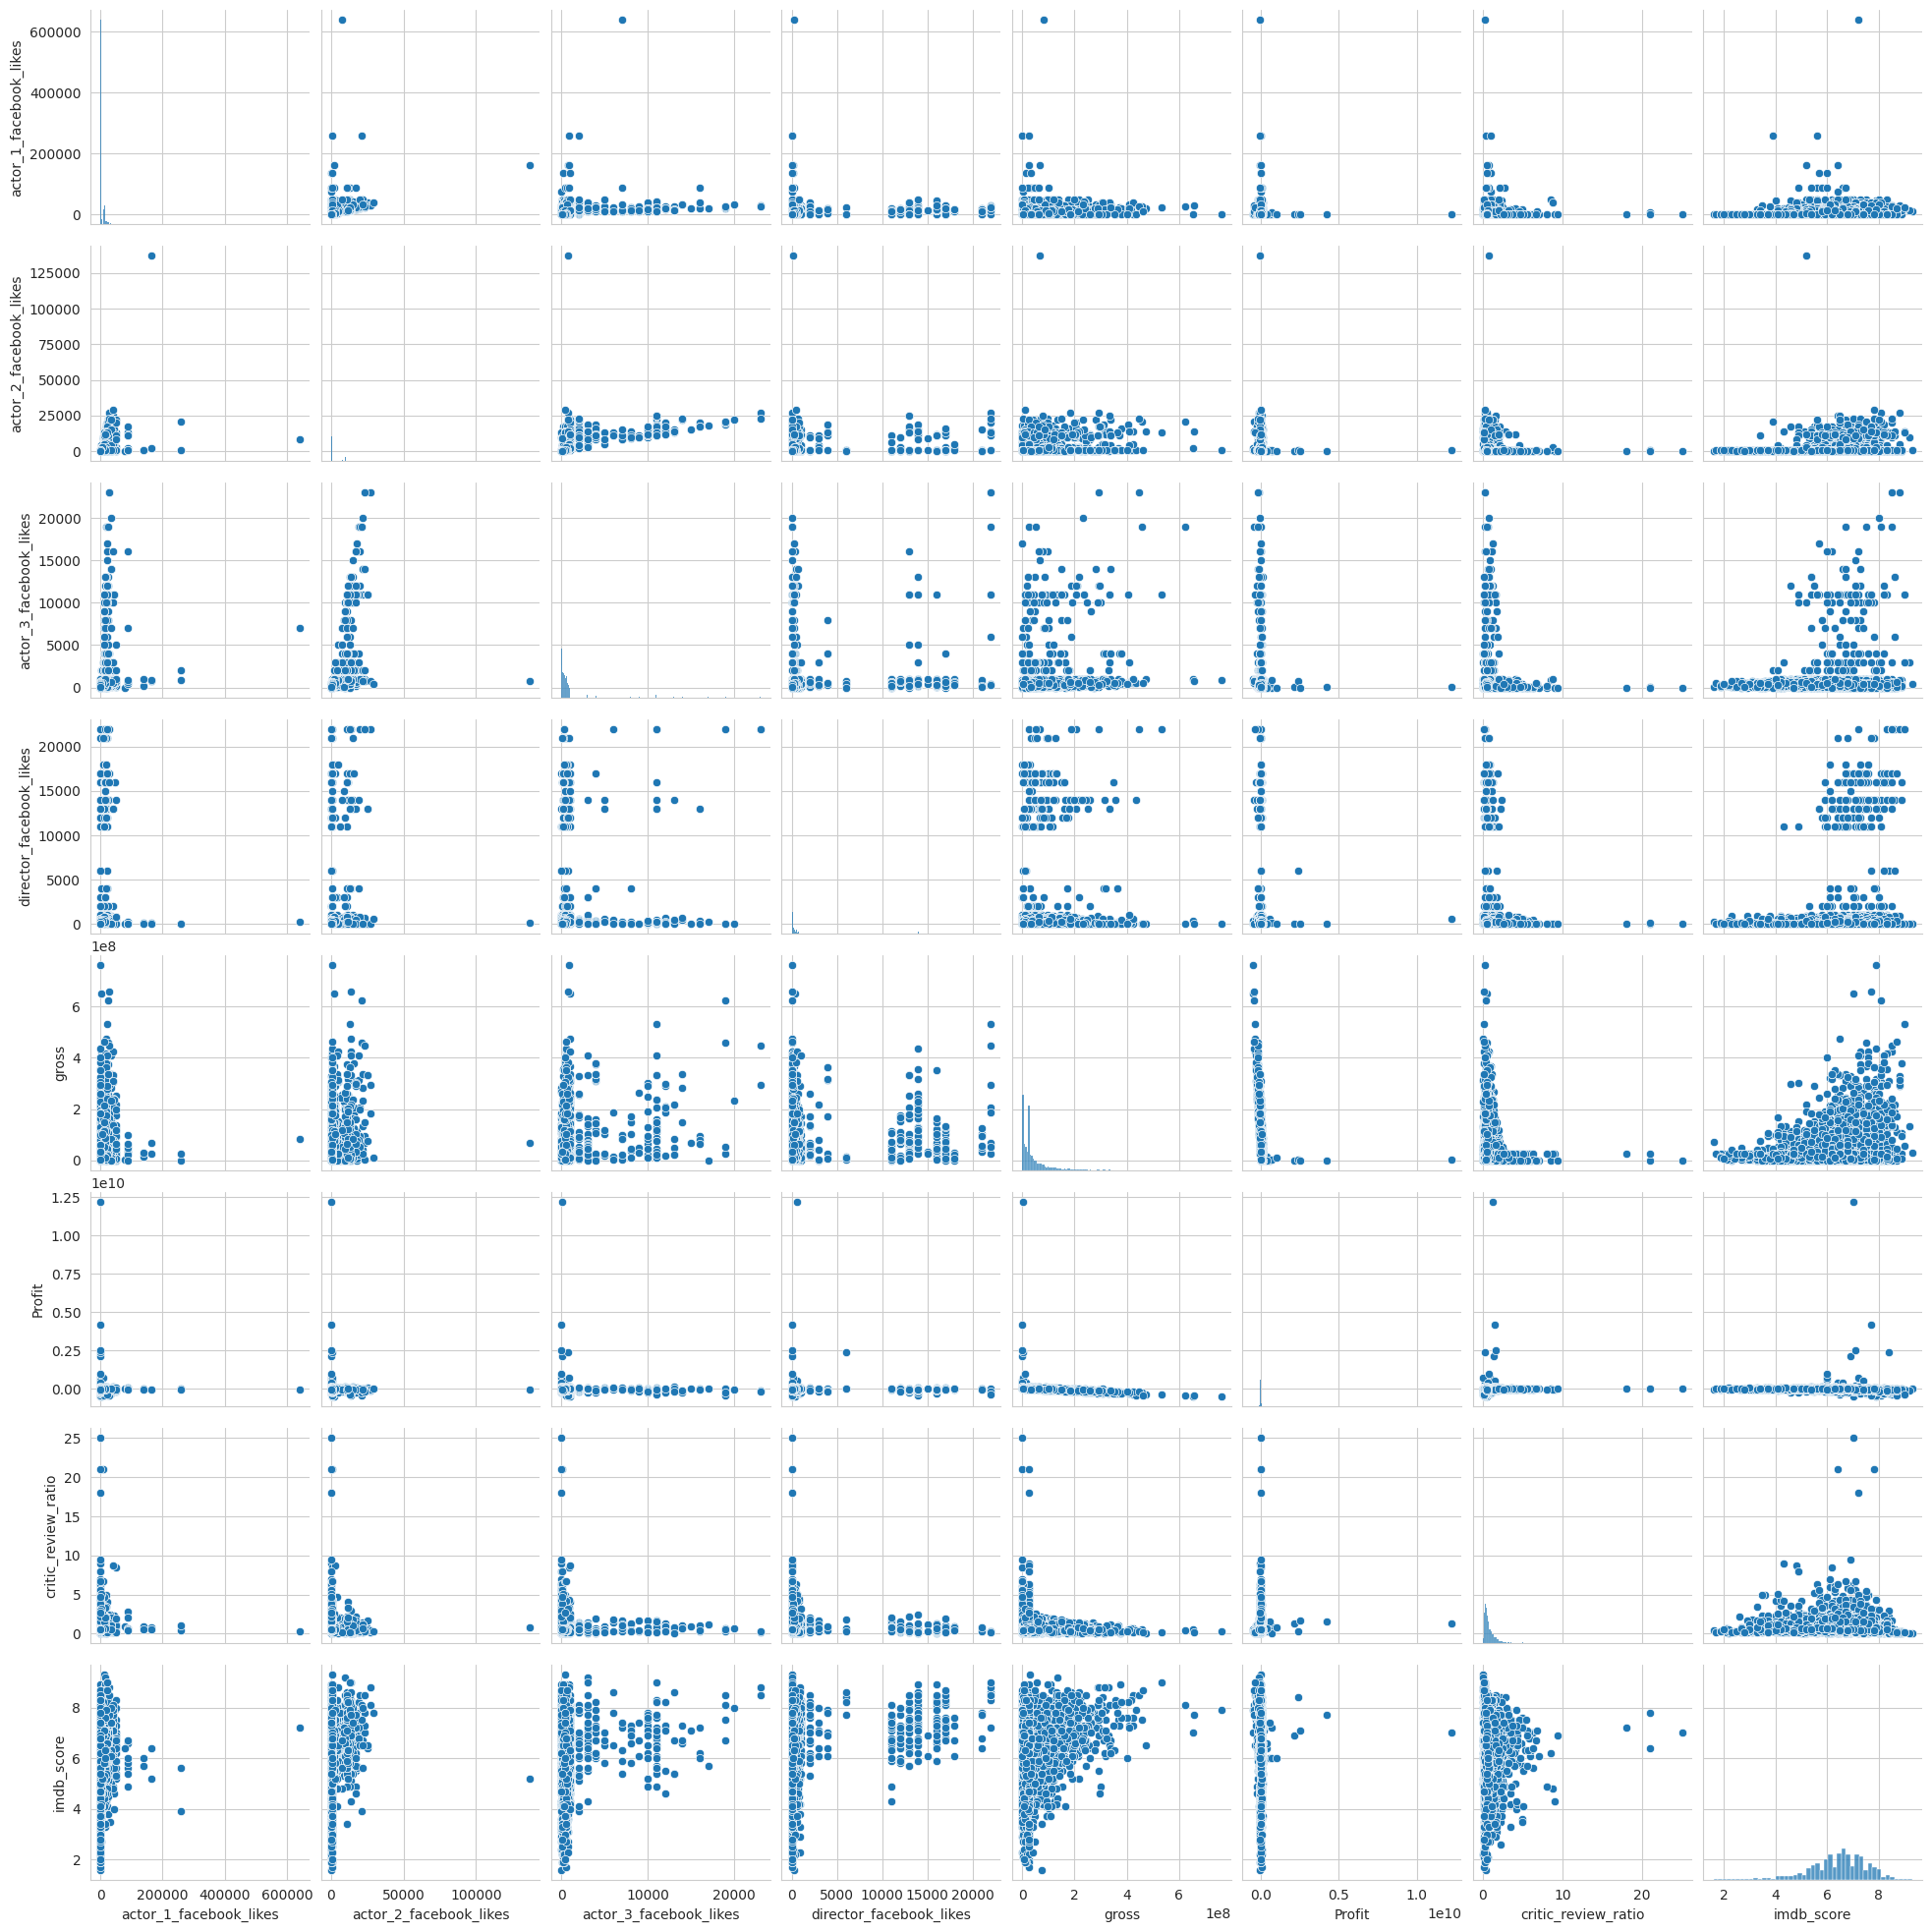

In [119]:
sns.pairplot(mov_train[['actor_1_facebook_likes','actor_2_facebook_likes','actor_3_facebook_likes','director_facebook_likes','gross','Profit','genre_1', 'genre_2','critic_review_ratio', 'imdb_score']])
plt.show()

### ** from above bi-variate graphical analysis of numeric data - It seems lot of data has outliers and most of the univariate graphs show the spread is not normal but skewed. Removing out liers may help showing some patterns

Also from the describe function we can see for some variables the difference between  mean to 75 percentile and that of 75 percentile to  Max is high. possible outliers

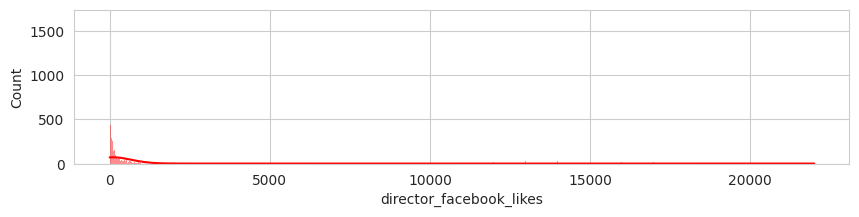

In [120]:
plt.figure(figsize = (10, 2))
sns.set_style('whitegrid')
sns.histplot(mov_train['director_facebook_likes'], kde = True, color ='red')
plt.show()

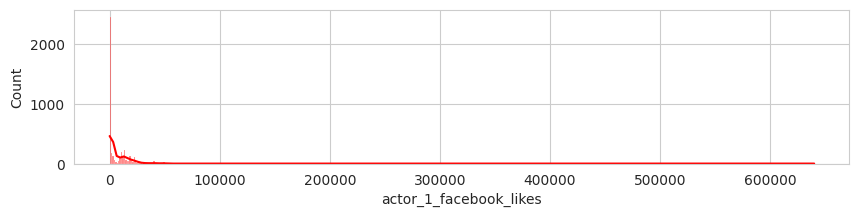

In [121]:
plt.figure(figsize = (10, 2))
sns.set_style('whitegrid')
sns.histplot(mov_train['actor_1_facebook_likes'], kde = True, color ='red')
#sns.pairplot(mov_train[['actor_1_facebook_likes','imdb_score']])
plt.show()

#### More than 50% actors dont have facebook likes - probably dont have facebook accounts but when lloking at the bi variate plot with IMDB SCORE many zero rating actors and directors have very high scores on IMDB

## Understanding Object type variables

In [122]:
mov_train.describe(include = [np.object])

/tmp/ipykernel_32/2433637860.py:1: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mov_train.describe(include = [np.object])


,director_name,actor_2_name,genres,actor_1_name,movie_title,actor_3_name,plot_keywords,language,country,content_rating,genre_1,genre_2
count,4225,4225,4225,4225,4225,4225,4225,4223,4225,4225,4225,4225
unique,2097,2633,822,1790,4155,3048,4152,37,54,15,19,23
top,Steven Spielberg,Morgan Freeman,[Drama],Robert De Niro,King Kong,Steve Coogan,animal name in title|ape abducts a woman|goril...,English,USA,R,Comedy,Drama
freq,25,19,186,42,3,8,3,3964,3208,2009,1129,1198


#### Language & has most of the data concentrated on one or two categories only. Counts to be looked closely.

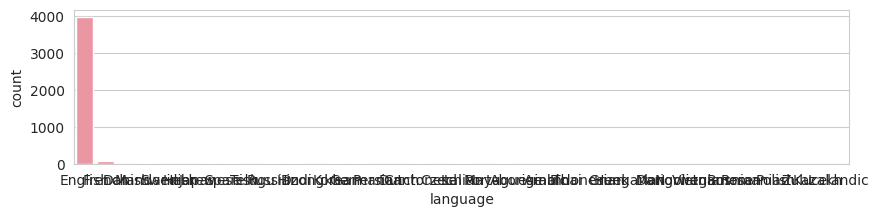

language  
English       3964
French          62
Spanish         32
Mandarin        22
Hindi           20
German          18
Japanese        15
Russian         10
Cantonese       10
Italian         10
Korean           8
Portuguese       7
Danish           4
Persian          4
Norwegian        4
Dutch            3
Hebrew           3
Arabic           3
Swedish          2
Thai             2
Aboriginal       2
Dari             2
Zulu             2
Kazakh           1
Indonesian       1
Maya             1
Mongolian        1
Icelandic        1
Hungarian        1
Polish           1
Greek            1
Romanian         1
Dzongkha         1
Czech            1
Telugu           1
Bosnian          1
Vietnamese       1
Name: count, dtype: int64

In [123]:
plt.figure(figsize = (10, 2))
sns.countplot(x ='language', data = mov_train)
plt.show()
mov_train[["language"]].value_counts()

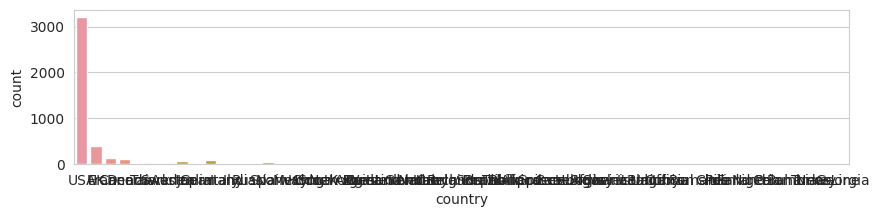

country       
USA               3208
UK                 379
France             135
Canada              94
Germany             89
Australia           51
Spain               30
India               23
China               23
Italy               19
Japan               18
Hong Kong           15
New Zealand         13
South Korea         12
Mexico              11
Denmark             10
Russia              10
Ireland             10
Brazil               8
South Africa         7
Norway               7
Netherlands          4
Sweden               3
Switzerland          3
Thailand             3
West Germany         3
Iran                 3
Czech Republic       3
Israel               2
Iceland              2
Belgium              2
Romania              2
Argentina            2
Finland              1
Bahamas              1
Turkey               1
Bulgaria             1
Taiwan               1
Cambodia             1
Chile                1
Colombia             1
Soviet Union         1
Georgia            

In [124]:
plt.figure(figsize = (10, 2))
sns.countplot(x ='country', data = mov_train)
plt.show()
mov_train[["country"]].value_counts()

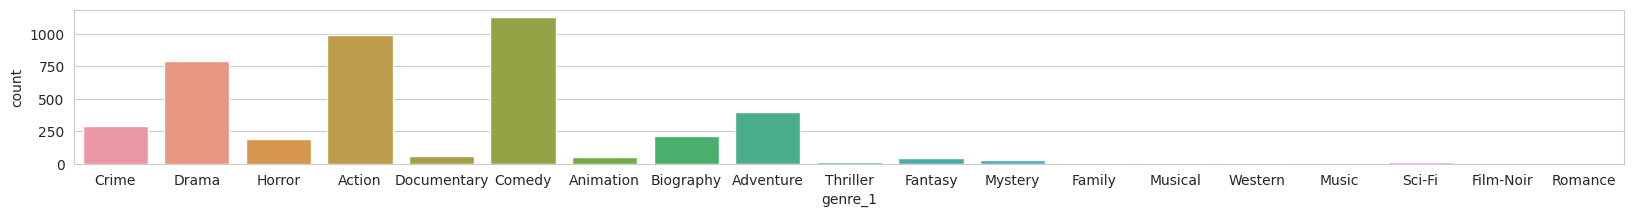

In [125]:
plt.figure(figsize = (20, 2))
sns.countplot(x ='genre_1', data = mov_train)
plt.show()

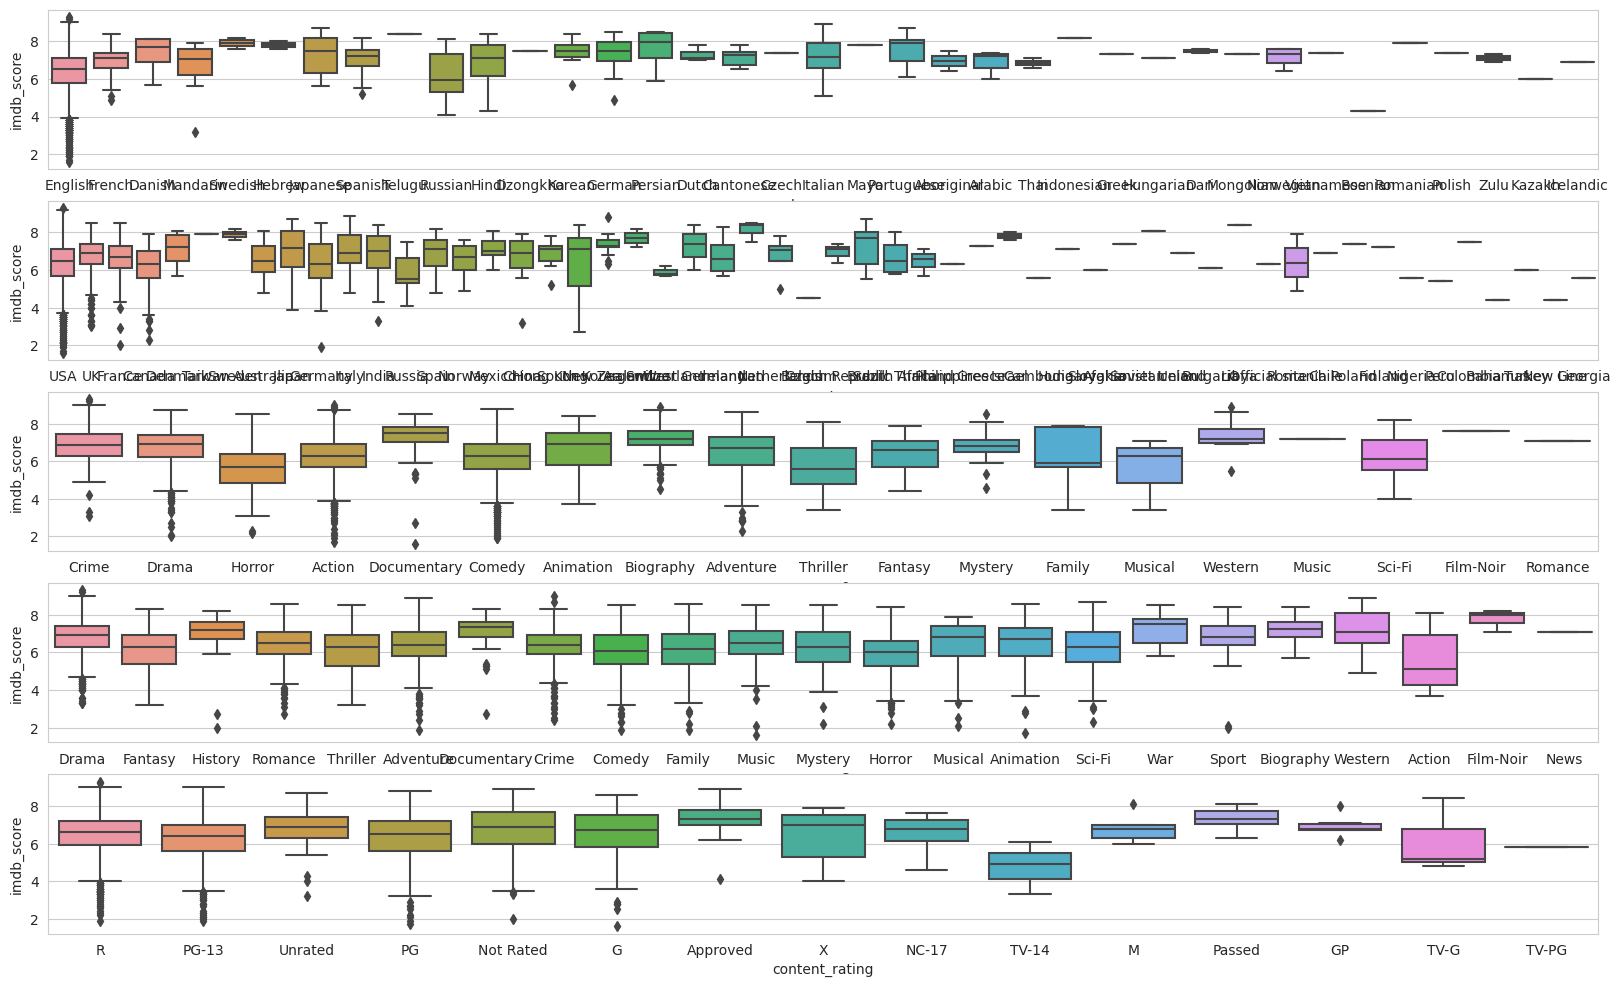

In [126]:
plt.figure(figsize=(20, 12))
plt.subplot(5,1,1)
sns.boxplot(x = 'language', y = 'imdb_score', data = mov_train)
plt.subplot(5,1,2)
sns.boxplot(x = 'country', y = 'imdb_score', data = mov_train)
plt.subplot(5,1,3)
sns.boxplot(x = 'genre_1', y = 'imdb_score', data = mov_train)
plt.subplot(5,1,4)
sns.boxplot(x = 'genre_2', y = 'imdb_score', data = mov_train)
plt.subplot(5,1,5)
sns.boxplot(x = 'content_rating', y = 'imdb_score', data = mov_train)
plt.show()

### From above Bi-variate analysis of some object variables of probable higher significance shows Genres and Content_rating certainly has a less categories and the data is well spread among vrious values and I believe this make these variables more valuable in defining the data.

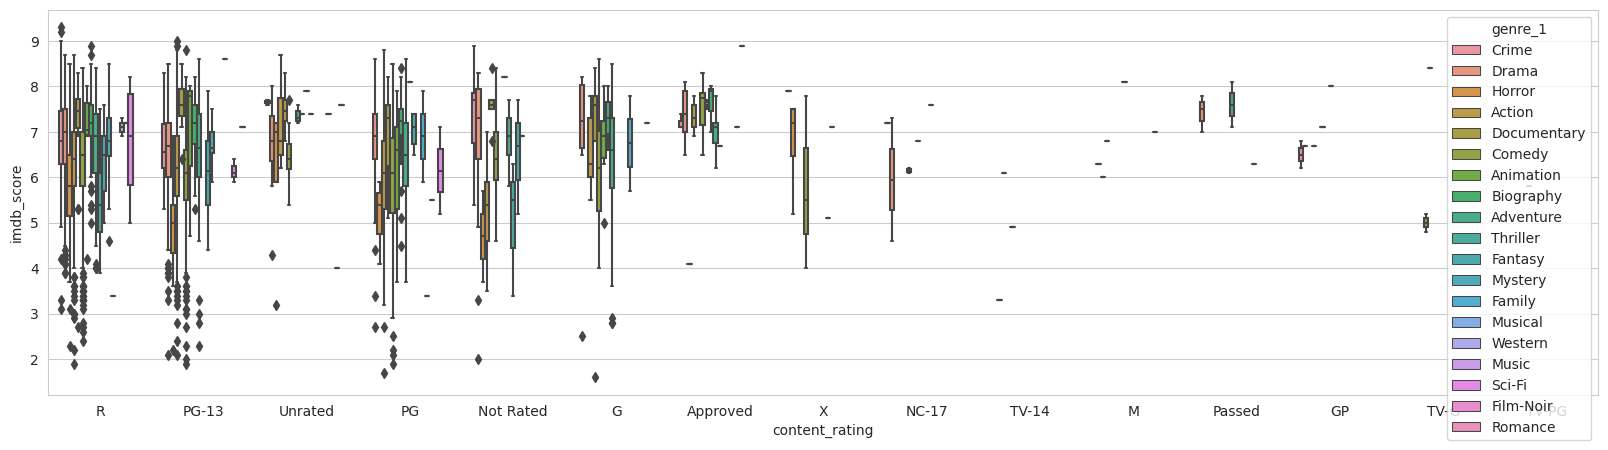

In [127]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'content_rating', y = 'imdb_score', hue = 'genre_1', data = mov_train)
plt.show()

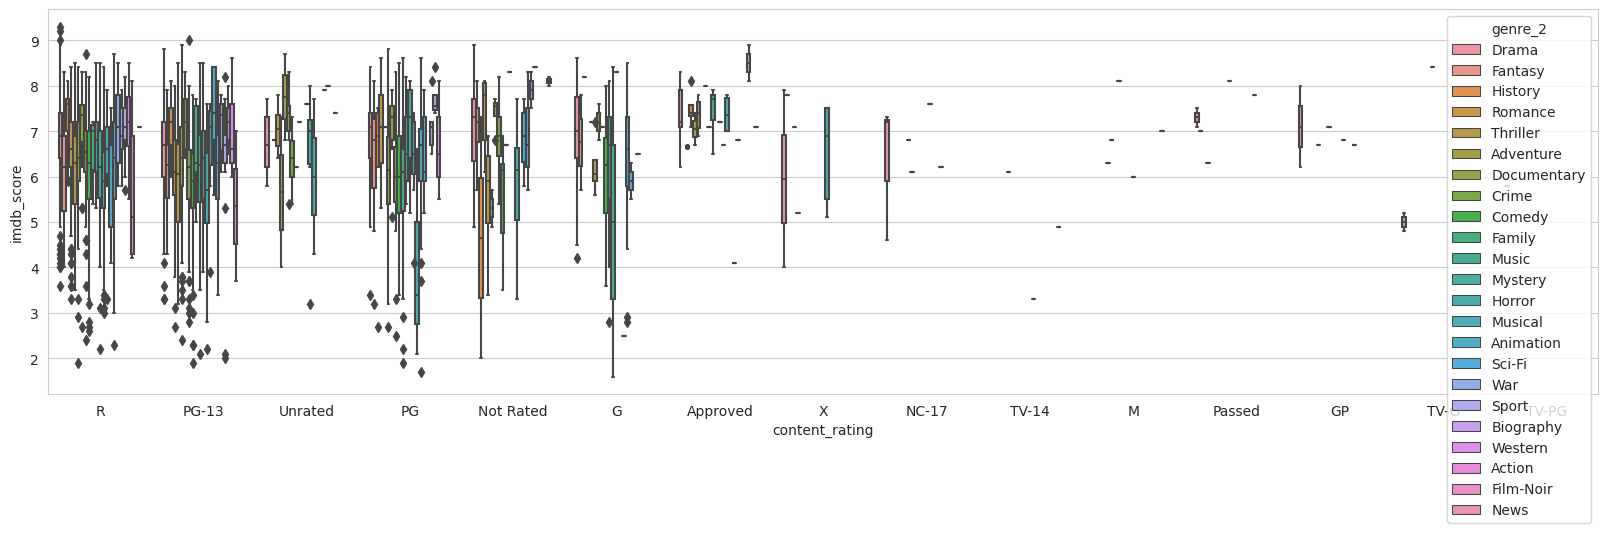

In [128]:
plt.figure(figsize = (20, 5))
sns.boxplot(x = 'content_rating', y = 'imdb_score', hue = 'genre_2', data = mov_train)
plt.show()

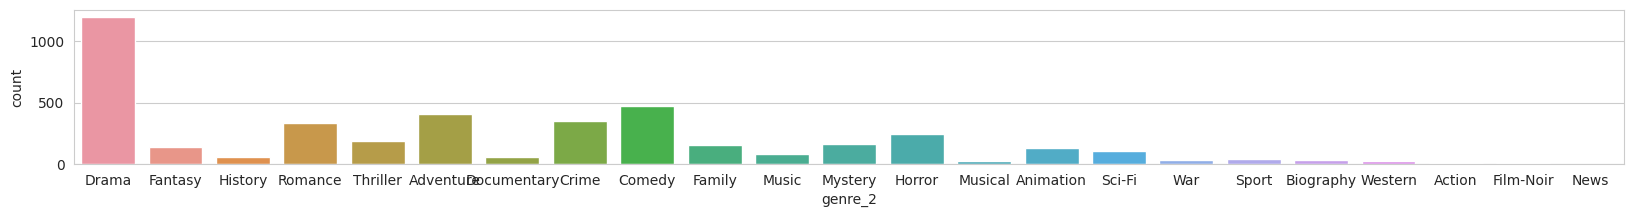

In [129]:
plt.figure(figsize = (20, 2))
sns.countplot(x ='genre_2', data = mov_train)
plt.show()

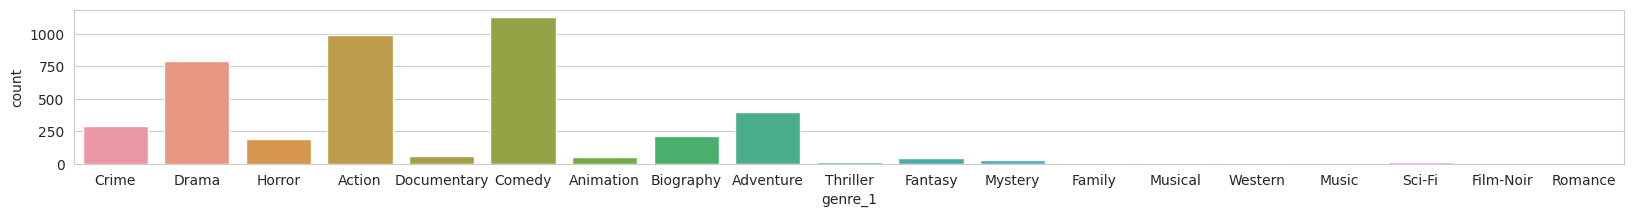

In [130]:
plt.figure(figsize = (20, 2))
sns.countplot(x ='genre_1', data = mov_train)
plt.show()

# ---------------------------------------------------------------------------------------------------------------

## Feature Engineering
* Convert Dummy Variables for Language, Country, Genre & Content Rating

In [131]:
d = {'English' : 'lang_English', 'French' : 'lang_Other', 'Spanish' : 'lang_Other', 'Mandarin' : 'lang_Other', 'Hindi' : 'lang_Other', 'German' : 'lang_Other', 'Japanese' : 'lang_Other', 'Russian' : 'lang_Other', 'Cantonese' : 'lang_Other', 'Italian' : 'lang_Other', 'Korean' : 'lang_Other', 'Portuguese' : 'lang_Other', 'Danish' : 'lang_Other', 'Persian' : 'lang_Other', 'Norwegian' : 'lang_Other', 'Dutch' : 'lang_Other', 'Hebrew' : 'lang_Other', 'Arabic' : 'lang_Other', 'Swedish' : 'lang_Other', 'Thai' : 'lang_Other', 'Aboriginal' : 'lang_Other', 'Dari' : 'lang_Other', 'Zulu' : 'lang_Other', 'Kazakh' : 'lang_Other', 'Indonesian' : 'lang_Other', 'Maya' : 'lang_Other', 'Mongolian' : 'lang_Other', 'Icelandic' : 'lang_Other', 'Hungarian' : 'lang_Other', 'Polish' : 'lang_Other', 'Greek' : 'lang_Other', 'Romanian' : 'lang_Other', 'Dzongkha' : 'lang_Other', 'Czech' : 'lang_Other', 'Telugu' : 'lang_Other', 'Bosnian' : 'lang_Other', 'Vietnamese' : 'lang_Other'}
mov_train[['language']] = mov_train[['language']].apply(lambda x: x.map(d))
lang=pd.get_dummies(mov_train['language'])
lang.drop('lang_Other', axis = 1, inplace = True)

lang[['lang_English']] = lang[['lang_English']].apply(lambda x: x.map({True:1, False:0}))
lang.head()

,lang_English
0,1
1,1
2,1
3,1
4,1


In [132]:
mov_train = pd.concat([mov_train, lang], axis = 1)
mov_train.drop(['language'], axis = 1, inplace = True)
mov_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,imdb_score,genre_1,genre_2,lang_English
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,"[Crime, Drama, Mystery, Thriller]",Denzel Washington,...,11000.0,2.35,0,-18488090.0,-27.806619,0.188917,6.7,Crime,Drama,1
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,"[Drama, Fantasy, Romance]",Alex Pettyfer,...,976.0,2.35,16000,-10854896.0,-38.969436,1.147287,5.6,Drama,Fantasy,1
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,"[Drama, History]",Anthony Hopkins,...,11000.0,1.85,0,-8175394.0,-18.506669,0.339207,7.2,Drama,History,1
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,"[Drama, Romance]",Heath Ledger,...,595.0,2.35,0,-27252964.0,-87.201214,0.293103,7.1,Drama,Romance,1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,"[Horror, Thriller]",Michael Fassbender,...,698.0,2.35,0,19994176.0,343306.593407,0.450980,6.8,Horror,Thriller,1


In [133]:
d = {'USA' : 'country_USA', 'UK' : 'country_UK', 'France' : 'country_FR', 'Canada' : 'country_Other', 'Germany' : 'country_Other', 'Australia' : 'country_Other', 'Spain' : 'country_Other', 'India' : 'country_Other', 'China' : 'country_Other', 'Italy' : 'country_Other', 'Japan' : 'country_Other', 'Hong Kong' : 'country_Other', 'New Zealand' : 'country_Other', 'South Korea' : 'country_Other', 'Mexico' : 'country_Other', 'Denmark' : 'country_Other', 'Russia' : 'country_Other', 'Ireland' : 'country_Other', 'Brazil' : 'country_Other', 'South Africa' : 'country_Other', 'Norway' : 'country_Other', 'Netherlands' : 'country_Other', 'Sweden' : 'country_Other', 'Switzerland' : 'country_Other', 'Thailand' : 'country_Other', 'West Germany' : 'country_Other', 'Iran' : 'country_Other', 'Czech Republic' : 'country_Other', 'Israel' : 'country_Other', 'Iceland' : 'country_Other', 'Belgium' : 'country_Other', 'Romania' : 'country_Other', 'Argentina' : 'country_Other', 'Finland' : 'country_Other', 'Bahamas' : 'country_Other', 'Turkey' : 'country_Other', 'Bulgaria' : 'country_Other', 'Taiwan' : 'country_Other', 'Cambodia' : 'country_Other', 'Chile' : 'country_Other', 'Colombia' : 'country_Other', 'Soviet Union' : 'country_Other', 'Georgia' : 'country_Other', 'Slovakia' : 'country_Other', 'Poland' : 'country_Other', 'Philippines' : 'country_Other', 'Peru' : 'country_Other', 'Official site' : 'country_Other', 'Greece' : 'country_Other', 'Nigeria' : 'country_Other', 'Hungary' : 'country_Other', 'New Line' : 'country_Other', 'Libya' : 'country_Other', 'Afghanistan' : 'country_Other'}
mov_train[['country']] = mov_train[['country']].apply(lambda x: x.map(d))
country=pd.get_dummies(mov_train['country'])
country.drop('country_Other', axis = 1, inplace = True)
country[['country_USA']] = country[['country_USA']].apply(lambda x: x.map({True:1, False:0}))
country[['country_UK']] = country[['country_UK']].apply(lambda x: x.map({True:1, False:0}))
country[['country_FR']] = country[['country_FR']].apply(lambda x: x.map({True:1, False:0}))

mov_train = pd.concat([mov_train, country], axis = 1)
mov_train.drop(['country'], axis = 1, inplace = True)
mov_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,Profit,Profit_Percentage,critic_review_ratio,imdb_score,genre_1,genre_2,lang_English,country_FR,country_UK,country_USA
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,"[Crime, Drama, Mystery, Thriller]",Denzel Washington,...,-18488090.0,-27.806619,0.188917,6.7,Crime,Drama,1,0,0,1
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,"[Drama, Fantasy, Romance]",Alex Pettyfer,...,-10854896.0,-38.969436,1.147287,5.6,Drama,Fantasy,1,0,0,1
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,"[Drama, History]",Anthony Hopkins,...,-8175394.0,-18.506669,0.339207,7.2,Drama,History,1,0,0,1
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,"[Drama, Romance]",Heath Ledger,...,-27252964.0,-87.201214,0.293103,7.1,Drama,Romance,1,0,0,1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,"[Horror, Thriller]",Michael Fassbender,...,19994176.0,343306.593407,0.450980,6.8,Horror,Thriller,1,0,1,0


In [134]:
d={'Drama' : 'genre_Drama', 'Comedy' : 'genre_Comedy', 'Action' : 'genre_Action', 'Adventure' : 'genre_Adventure', 'Crime' : 'genre_Crime', 'Horror' : 'genre_Horror', 'Romance' : 'genre_Romance', 'Biography' : 'genre_other', 'Thriller' : 'genre_other', 'Mystery' : 'genre_other', 'Fantasy' : 'genre_other', 'Animation' : 'genre_other', 'Family' : 'genre_other', 'Sci-Fi' : 'genre_other', 'Documentary' : 'genre_other', 'Music' : 'genre_other', 'History' : 'genre_other', 'Sport' : 'genre_other', 'War' : 'genre_other', 'Western' : 'genre_other', 'Musical' : 'genre_other', 'Film-Noir' : 'genre_other', 'News' : 'genre_other'}
mov_train[['genre_1']] = mov_train[['genre_1']].apply(lambda x: x.map(d))
genre=pd.get_dummies(mov_train['genre_1'])
genre.drop('genre_other', axis = 1, inplace = True)
genre[['genre_Drama']] = genre[['genre_Drama']].apply(lambda x: x.map({True:1, False:0}))
genre[['genre_Comedy']] = genre[['genre_Comedy']].apply(lambda x: x.map({True:1, False:0}))
genre[['genre_Action']] = genre[['genre_Action']].apply(lambda x: x.map({True:1, False:0}))
genre[['genre_Adventure']] = genre[['genre_Adventure']].apply(lambda x: x.map({True:1, False:0}))
genre[['genre_Crime']] = genre[['genre_Crime']].apply(lambda x: x.map({True:1, False:0}))
genre[['genre_Horror']] = genre[['genre_Horror']].apply(lambda x: x.map({True:1, False:0}))
genre[['genre_Romance']] = genre[['genre_Romance']].apply(lambda x: x.map({True:1, False:0}))
mov_train = pd.concat([mov_train, genre], axis = 1)
mov_train.drop(['genre_1'], axis = 1, inplace = True)
mov_train.drop(['genre_2'], axis = 1, inplace = True)
mov_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country_FR,country_UK,country_USA,genre_Action,genre_Adventure,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Romance
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,"[Crime, Drama, Mystery, Thriller]",Denzel Washington,...,0,0,1,0,0,0,1,0,0,0
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,"[Drama, Fantasy, Romance]",Alex Pettyfer,...,0,0,1,0,0,0,0,1,0,0
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,"[Drama, History]",Anthony Hopkins,...,0,0,1,0,0,0,0,1,0,0
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,"[Drama, Romance]",Heath Ledger,...,0,0,1,0,0,0,0,1,0,0
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,"[Horror, Thriller]",Michael Fassbender,...,0,1,0,0,0,0,0,0,1,0


In [135]:
d={'R' : 'contentRate_R', 'PG-13' : 'contentRate_PG-13', 'PG' : 'contentRate_PG', 'G' : 'contentRate_other', 'Not Rated' : 'contentRate_other', 'Unrated' : 'contentRate_other', 'Approved' : 'contentRate_other', 'X' : 'contentRate_other', 'NC-17' : 'contentRate_other', 'GP' : 'contentRate_other', 'Passed' : 'contentRate_other', 'M' : 'contentRate_other', 'TV-14' : 'contentRate_other', 'TV-G' : 'contentRate_other', 'TV-PG' : 'contentRate_other'}
mov_train[['content_rating']] = mov_train[['content_rating']].apply(lambda x: x.map(d))
cnt_rt=pd.get_dummies(mov_train['content_rating'])
cnt_rt.drop('contentRate_other', axis = 1, inplace = True)
cnt_rt[['contentRate_R']] = cnt_rt[['contentRate_R']].apply(lambda x: x.map({True:1, False:0}))
cnt_rt[['contentRate_PG-13']] = cnt_rt[['contentRate_PG-13']].apply(lambda x: x.map({True:1, False:0}))
cnt_rt[['contentRate_PG']] = cnt_rt[['contentRate_PG']].apply(lambda x: x.map({True:1, False:0}))
mov_train = pd.concat([mov_train, cnt_rt], axis = 1)
mov_train.drop(['content_rating'], axis = 1, inplace = True)
mov_train.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,genre_Action,genre_Adventure,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,genre_Romance,contentRate_PG,contentRate_PG-13,contentRate_R
0,1042,Phillip Noyce,118.0,176.0,308.0,Angelina Jolie Pitt,18000.0,66488090.0,"[Crime, Drama, Mystery, Thriller]",Denzel Washington,...,0,0,0,1,0,0,0,0,0,1
1,2501,Daniel Barnz,86.0,33.0,583.0,Mary-Kate Olsen,15000.0,27854896.0,"[Drama, Fantasy, Romance]",Alex Pettyfer,...,0,0,0,0,1,0,0,0,1,0
2,1248,Steven Spielberg,155.0,14000.0,11000.0,Morgan Freeman,12000.0,44175394.0,"[Drama, History]",Anthony Hopkins,...,0,0,0,0,1,0,0,0,0,1
3,3892,Marc Forster,112.0,395.0,80.0,Peter Boyle,13000.0,31252964.0,"[Drama, Romance]",Heath Ledger,...,0,0,0,0,1,0,0,0,0,1
4,4315,James Watkins,91.0,43.0,418.0,Jack O'Connell,13000.0,5824.0,"[Horror, Thriller]",Michael Fassbender,...,0,0,0,0,0,1,0,0,0,1


#### Lets drop some variblaes which we havent convertedfrom Object & doesnt look of much significance

In [136]:
mov_train.drop(['director_name','actor_3_name','actor_2_name', 'genres','actor_1_name', 'movie_title', 'facenumber_in_poster','plot_keywords'], axis = 1, inplace = True)

In [137]:
# 2 features missing in test set
mov_train=  mov_train.drop(['genre_Romance', 'num_voted_users'], axis = 1)

In [138]:
mov_train = pd.DataFrame(mov_train).set_index('s_no')

## Replicating changes in Test Matrix

In [139]:
d = {'English' : 'lang_English', 'French' : 'lang_Other', 'Spanish' : 'lang_Other', 'Mandarin' : 'lang_Other', 'Hindi' : 'lang_Other', 'German' : 'lang_Other', 'Japanese' : 'lang_Other', 'Russian' : 'lang_Other', 'Cantonese' : 'lang_Other', 'Italian' : 'lang_Other', 'Korean' : 'lang_Other', 'Portuguese' : 'lang_Other', 'Danish' : 'lang_Other', 'Persian' : 'lang_Other', 'Norwegian' : 'lang_Other', 'Dutch' : 'lang_Other', 'Hebrew' : 'lang_Other', 'Arabic' : 'lang_Other', 'Swedish' : 'lang_Other', 'Thai' : 'lang_Other', 'Aboriginal' : 'lang_Other', 'Dari' : 'lang_Other', 'Zulu' : 'lang_Other', 'Kazakh' : 'lang_Other', 'Indonesian' : 'lang_Other', 'Maya' : 'lang_Other', 'Mongolian' : 'lang_Other', 'Icelandic' : 'lang_Other', 'Hungarian' : 'lang_Other', 'Polish' : 'lang_Other', 'Greek' : 'lang_Other', 'Romanian' : 'lang_Other', 'Dzongkha' : 'lang_Other', 'Czech' : 'lang_Other', 'Telugu' : 'lang_Other', 'Bosnian' : 'lang_Other', 'Vietnamese' : 'lang_Other'}
mov_test[['language']] = mov_test[['language']].apply(lambda x: x.map(d))
lang=pd.get_dummies(mov_test['language'])
lang.drop('lang_Other', axis = 1, inplace = True)
mov_test = pd.concat([mov_test, lang], axis = 1)
mov_test.drop(['language'], axis = 1, inplace = True)
mov_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,content_rating,budget,title_year,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,lang_English
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,Action|Mystery|Thriller,Ken Arnold,...,PG-13,35000000.0,2011.0,73.0,2.35,13000,6935774.0,24.713933,1.040462,True
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,...,G,20000000.0,2006.0,8000.0,1.85,0,-62506325.0,-75.759434,1.176471,True
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,Drama|Thriller,Michael Abbott Jr.,...,PG-13,20000000.0,2007.0,32.0,2.35,773,19954339.0,43701.055605,2.656250,True
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,Angelina Jolie Pitt,...,R,55000000.0,2008.0,963.0,2.35,14000,19292673.0,54.030012,0.682171,True
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,Drama,Logan Browning,...,R,1900000.0,2015.0,606.0,1.85,1000,1455956.0,327.885525,0.526316,True


In [140]:
d = {'USA' : 'country_USA', 'UK' : 'country_UK', 'France' : 'country_FR', 'Canada' : 'country_Other', 'Germany' : 'country_Other', 'Australia' : 'country_Other', 'Spain' : 'country_Other', 'India' : 'country_Other', 'China' : 'country_Other', 'Italy' : 'country_Other', 'Japan' : 'country_Other', 'Hong Kong' : 'country_Other', 'New Zealand' : 'country_Other', 'South Korea' : 'country_Other', 'Mexico' : 'country_Other', 'Denmark' : 'country_Other', 'Russia' : 'country_Other', 'Ireland' : 'country_Other', 'Brazil' : 'country_Other', 'South Africa' : 'country_Other', 'Norway' : 'country_Other', 'Netherlands' : 'country_Other', 'Sweden' : 'country_Other', 'Switzerland' : 'country_Other', 'Thailand' : 'country_Other', 'West Germany' : 'country_Other', 'Iran' : 'country_Other', 'Czech Republic' : 'country_Other', 'Israel' : 'country_Other', 'Iceland' : 'country_Other', 'Belgium' : 'country_Other', 'Romania' : 'country_Other', 'Argentina' : 'country_Other', 'Finland' : 'country_Other', 'Bahamas' : 'country_Other', 'Turkey' : 'country_Other', 'Bulgaria' : 'country_Other', 'Taiwan' : 'country_Other', 'Cambodia' : 'country_Other', 'Chile' : 'country_Other', 'Colombia' : 'country_Other', 'Soviet Union' : 'country_Other', 'Georgia' : 'country_Other', 'Slovakia' : 'country_Other', 'Poland' : 'country_Other', 'Philippines' : 'country_Other', 'Peru' : 'country_Other', 'Official site' : 'country_Other', 'Greece' : 'country_Other', 'Nigeria' : 'country_Other', 'Hungary' : 'country_Other', 'New Line' : 'country_Other', 'Libya' : 'country_Other', 'Afghanistan' : 'country_Other'}
mov_test[['country']] = mov_test[['country']].apply(lambda x: x.map(d))
country=pd.get_dummies(mov_test['country'])
country.drop('country_Other', axis = 1, inplace = True)
mov_test = pd.concat([mov_test, country], axis = 1)
mov_test.drop(['country'], axis = 1, inplace = True)
mov_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,actor_2_facebook_likes,aspect_ratio,movie_facebook_likes,Profit,Profit_Percentage,critic_review_ratio,lang_English,country_FR,country_UK,country_USA
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,Action|Mystery|Thriller,Ken Arnold,...,73.0,2.35,13000,6935774.0,24.713933,1.040462,True,False,False,True
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,Comedy|Family|Fantasy,Steve Buscemi,...,8000.0,1.85,0,-62506325.0,-75.759434,1.176471,True,False,False,True
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,Drama|Thriller,Michael Abbott Jr.,...,32.0,2.35,773,19954339.0,43701.055605,2.656250,True,False,False,True
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,Crime|Drama|Mystery|Thriller,Angelina Jolie Pitt,...,963.0,2.35,14000,19292673.0,54.030012,0.682171,True,False,False,True
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,Drama,Logan Browning,...,606.0,1.85,1000,1455956.0,327.885525,0.526316,True,False,False,True


In [141]:
mov_test['genres'] = mov_test['genres'].str.split('|')
mov_test['genre_1'] = mov_test['genres'].apply(lambda x: x[0])
mov_test['genre_2'] = mov_test['genres'].apply(lambda x : x[1] if len(x) > 1 else x[0])
mov_test['genre_1'],mov_test[ 'genre_2']


(0         Action
 1         Comedy
 2          Drama
 3          Crime
 4          Drama
          ...    
 465        Drama
 466        Drama
 467        Drama
 468       Comedy
 469    Biography
 Name: genre_1, Length: 470, dtype: object,
 0       Mystery
 1        Family
 2      Thriller
 3         Drama
 4         Drama
          ...   
 465     Romance
 466     Fantasy
 467       Drama
 468       Drama
 469      Comedy
 Name: genre_2, Length: 470, dtype: object)

In [142]:
d={'Drama' : 'genre_Drama', 'Comedy' : 'genre_Comedy', 'Action' : 'genre_Action', 'Adventure' : 'genre_Adventure', 'Crime' : 'genre_Crime', 'Horror' : 'genre_Horror', 'Romance' : 'genre_Romance', 'Biography' : 'genre_other', 'Thriller' : 'genre_other', 'Mystery' : 'genre_other', 'Fantasy' : 'genre_other', 'Animation' : 'genre_other', 'Family' : 'genre_other', 'Sci-Fi' : 'genre_other', 'Documentary' : 'genre_other', 'Music' : 'genre_other', 'History' : 'genre_other', 'Sport' : 'genre_other', 'War' : 'genre_other', 'Western' : 'genre_other', 'Musical' : 'genre_other', 'Film-Noir' : 'genre_other', 'News' : 'genre_other'}
mov_test[['genre_1']] = mov_test[['genre_1']].apply(lambda x: x.map(d))
genre=pd.get_dummies(mov_test['genre_1'])
genre.drop('genre_other', axis = 1, inplace = True)
mov_test = pd.concat([mov_test, genre], axis = 1)
mov_test.drop(['genre_1'], axis = 1, inplace = True)
mov_test.drop(['genre_2'], axis = 1, inplace = True)
mov_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,lang_English,country_FR,country_UK,country_USA,genre_Action,genre_Adventure,genre_Comedy,genre_Crime,genre_Drama,genre_Horror
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,"[Action, Mystery, Thriller]",Ken Arnold,...,True,False,False,True,True,False,False,False,False,False
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,"[Comedy, Family, Fantasy]",Steve Buscemi,...,True,False,False,True,False,False,True,False,False,False
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,"[Drama, Thriller]",Michael Abbott Jr.,...,True,False,False,True,False,False,False,False,True,False
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,"[Crime, Drama, Mystery, Thriller]",Angelina Jolie Pitt,...,True,False,False,True,False,False,False,True,False,False
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,[Drama],Logan Browning,...,True,False,False,True,False,False,False,False,True,False


In [143]:
d={'R' : 'contentRate_R', 'PG-13' : 'contentRate_PG-13', 'PG' : 'contentRate_PG', 'G' : 'contentRate_other', 'Not Rated' : 'contentRate_other', 'Unrated' : 'contentRate_other', 'Approved' : 'contentRate_other', 'X' : 'contentRate_other', 'NC-17' : 'contentRate_other', 'GP' : 'contentRate_other', 'Passed' : 'contentRate_other', 'M' : 'contentRate_other', 'TV-14' : 'contentRate_other', 'TV-G' : 'contentRate_other', 'TV-PG' : 'contentRate_other'}
mov_test[['content_rating']] = mov_test[['content_rating']].apply(lambda x: x.map(d))
cnt_rt=pd.get_dummies(mov_test['content_rating'])
cnt_rt.drop('contentRate_other', axis = 1, inplace = True)
mov_test = pd.concat([mov_test, cnt_rt], axis = 1)
mov_test.drop(['content_rating'], axis = 1, inplace = True)
mov_test.head()

,s_no,director_name,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,actor_1_name,...,country_USA,genre_Action,genre_Adventure,genre_Comedy,genre_Crime,genre_Drama,genre_Horror,contentRate_PG,contentRate_PG-13,contentRate_R
0,1469,John Singleton,106.0,309.0,63.0,Benjamin J. Cain Jr.,327.0,28064226.0,"[Action, Mystery, Thriller]",Ken Arnold,...,True,True,False,False,False,False,False,False,True,False
1,444,Gary Winick,97.0,56.0,852.0,Julia Roberts,12000.0,82506325.0,"[Comedy, Family, Fantasy]",Steve Buscemi,...,True,False,False,True,False,False,False,False,False,False
2,4871,Jeff Nichols,92.0,337.0,22.0,Natalie Canerday,35.0,45661.0,"[Drama, Thriller]",Michael Abbott Jr.,...,True,False,False,False,False,True,False,False,True,False
3,877,Clint Eastwood,141.0,16000.0,539.0,Michael Kelly,11000.0,35707327.0,"[Crime, Drama, Mystery, Thriller]",Angelina Jolie Pitt,...,True,False,False,False,True,False,False,False,False,True
4,4355,Jamal Hill,89.0,47.0,585.0,Adam Ratcliffe,628.0,444044.0,[Drama],Logan Browning,...,True,False,False,False,False,True,False,False,False,True


In [144]:
mov_test.drop(['director_name','actor_3_name','actor_2_name', 'actor_1_name', 'movie_title', 'num_voted_users','genres', 'facenumber_in_poster','plot_keywords'], axis = 1, inplace = True)

In [145]:
mov_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 470 entries, 0 to 469
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   s_no                       470 non-null    int64  
 1   duration                   470 non-null    float64
 2   director_facebook_likes    470 non-null    float64
 3   actor_3_facebook_likes     470 non-null    float64
 4   actor_1_facebook_likes     470 non-null    float64
 5   gross                      470 non-null    float64
 6   cast_total_facebook_likes  470 non-null    int64  
 7   budget                     470 non-null    float64
 8   title_year                 470 non-null    float64
 9   actor_2_facebook_likes     470 non-null    float64
 10  aspect_ratio               470 non-null    float64
 11  movie_facebook_likes       470 non-null    int64  
 12  Profit                     470 non-null    float64
 13  Profit_Percentage          470 non-null    float64

In [146]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 1042 to 3118
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   4225 non-null   float64
 1   director_facebook_likes    4225 non-null   float64
 2   actor_3_facebook_likes     4225 non-null   float64
 3   actor_1_facebook_likes     4225 non-null   float64
 4   gross                      4225 non-null   float64
 5   cast_total_facebook_likes  4225 non-null   int64  
 6   budget                     4225 non-null   float64
 7   title_year                 4225 non-null   float64
 8   actor_2_facebook_likes     4225 non-null   float64
 9   aspect_ratio               4225 non-null   float64
 10  movie_facebook_likes       4225 non-null   int64  
 11  Profit                     4225 non-null   float64
 12  Profit_Percentage          4225 non-null   float64
 13  critic_review_ratio        4225 non-null   float64

# ---------------------------------------------------------------------------------------------------------------------

## Setting up Train Test Sets & Model Creation

In [148]:
#mov_train2=  mov_train.drop([ 'cast_total_facebook_likes', 'budget',
#       'aspect_ratio', 'Profit', 'country_FR',
#       'country_UK', 'genre_Action', 'genre_Adventure',
#       'genre_Comedy', 'genre_Crime', 'genre_Drama', 'contentRate_PG', 'contentRate_PG-13',
#       'contentRate_R'], axis = 1)

In [150]:
#mov_test2=  mov_test.drop([ 'cast_total_facebook_likes', 'budget',
#       'aspect_ratio', 'Profit', 'country_FR',
#       'country_UK', 'genre_Action', 'genre_Adventure',
#       'genre_Comedy', 'genre_Crime', 'genre_Drama', 'contentRate_PG', 'contentRate_PG-13',
#       'contentRate_R'], axis = 1)

In [152]:
mov_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 1042 to 3118
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   4225 non-null   float64
 1   director_facebook_likes    4225 non-null   float64
 2   actor_3_facebook_likes     4225 non-null   float64
 3   actor_1_facebook_likes     4225 non-null   float64
 4   gross                      4225 non-null   float64
 5   cast_total_facebook_likes  4225 non-null   int64  
 6   budget                     4225 non-null   float64
 7   title_year                 4225 non-null   float64
 8   actor_2_facebook_likes     4225 non-null   float64
 9   aspect_ratio               4225 non-null   float64
 10  movie_facebook_likes       4225 non-null   int64  
 11  Profit                     4225 non-null   float64
 12  Profit_Percentage          4225 non-null   float64
 13  critic_review_ratio        4225 non-null   float64

In [90]:
#x = mov_train2.iloc[ : ,0:10]
#x1 = mov_train2.iloc[ : ,11:14]
#x = pd.concat([x, x1], axis = 1)
#y = mov_train2.iloc[ : ,10:11]
#feature_names = ['duration','director_facebook_likes', 'actor_3_facebook_likes', 'actor_1_facebook_likes', 'gross', 'title_year', 'actor_2_facebook_likes', 'movie_facebook_likes','Profit_Percentage', 'critic_review_ratio','lang_English','country_USA','genre_Horror']

In [153]:
x = mov_train.iloc[ : ,0:14]
x1 = mov_train.iloc[ : ,15:28]
x = pd.concat([x, x1], axis = 1)
y = mov_train.iloc[ : ,14:15]


In [154]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4225 entries, 1042 to 3118
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   duration                   4225 non-null   float64
 1   director_facebook_likes    4225 non-null   float64
 2   actor_3_facebook_likes     4225 non-null   float64
 3   actor_1_facebook_likes     4225 non-null   float64
 4   gross                      4225 non-null   float64
 5   cast_total_facebook_likes  4225 non-null   int64  
 6   budget                     4225 non-null   float64
 7   title_year                 4225 non-null   float64
 8   actor_2_facebook_likes     4225 non-null   float64
 9   aspect_ratio               4225 non-null   float64
 10  movie_facebook_likes       4225 non-null   int64  
 11  Profit                     4225 non-null   float64
 12  Profit_Percentage          4225 non-null   float64
 13  critic_review_ratio        4225 non-null   float64

In [155]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20)

In [156]:
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [157]:
y_train

,imdb_score
s_no,
3357,7.9
3021,6.0
4848,4.3
868,7.3
1230,7.7
...,...
2835,8.0
4449,7.7
4905,7.1


In [158]:
from sklearn.tree import DecisionTreeRegressor
from sklearn import metrics

from sklearn.ensemble import (
    GradientBoostingRegressor,
    RandomForestRegressor,
    VotingRegressor,
)
from sklearn.linear_model import LinearRegression


reg1 = GradientBoostingRegressor(random_state=1)
reg2 = RandomForestRegressor(random_state=1)
reg3 = LinearRegression()

reg1.fit(x_train, y_train)
reg2.fit(x_train, y_train)
reg3.fit(x_train, y_train)

ereg = VotingRegressor([("gb", reg1), ("rf", reg2), ("lr", reg3)])
ereg.fit(x_train, y_train)

pred1 = reg1.predict(x_test)
pred2 = reg2.predict(x_test)
pred3 = reg3.predict(x_test)
pred4 = ereg.predict(x_test)


# Fit regression model
#model1 = DecisionTreeRegressor(max_depth=2)
#model = DecisionTreeRegressor(max_depth=5)
#model1.fit(x_train, y_train)
#model.fit(x_train, y_train)

#y_pred = model.predict(x_test)
#y_2 = model2.predict(x_test)

#r2 =round(metrics.r2_score(y_test, y_pred),2)
#r2_2 =round(metrics.r2_score(y_test, pred1),2)
#rmse =round(np.sqrt(metrics.mean_squared_error(y_test, y_pred)),2)
#rmse2 =round(np.sqrt(metrics.mean_squared_error(y_test, pred1)),2)
#print(r2, rmse)
#print(r2_2, rmse2)

/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/tmp/ipykernel_32/2196210106.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  reg2.fit(x_train, y_train)
/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_voting.py:597: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [159]:
print(round(metrics.r2_score(y_test, pred1),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred1)),2))
print(round(metrics.r2_score(y_test, pred2),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred2)),2))
print(round(metrics.r2_score(y_test, pred3),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred3)),2))
print(round(metrics.r2_score(y_test, pred4),2), round(np.sqrt(metrics.mean_squared_error(y_test, pred4)),2))

0.52 0.78
0.49 0.8
0.34 0.91
0.51 0.79


## -------------- Now running prediction on the Input Test Data 

In [160]:
x_test_given = mov_test.iloc[ : ,1:28]
y_pred1 = mov_test.iloc[ : ,0:1]
print(x_test_given.shape,y_pred1.shape)

(470, 27) (470, 1)


In [98]:
#x_test_given = x_test_given.drop([ 'cast_total_facebook_likes', 'budget',
#       'aspect_ratio', 'Profit', 'country_FR',
#       'country_UK', 'genre_Action', 'genre_Adventure',
#       'genre_Comedy', 'genre_Crime', 'genre_Drama', 'contentRate_PG', 'contentRate_PG-13',
#      'contentRate_R'], axis = 1)

In [161]:
x_test_given = sc.transform(x_test_given)

In [162]:
y_pred1["imdb_score"] = reg2.predict(x_test_given)

In [163]:
y_pred1

,s_no,imdb_score
0,1469,6.355
1,444,6.352
2,4871,6.357
3,877,7.453
4,4355,5.777
...,...,...
465,3899,6.927
466,1330,6.982
467,4358,7.849
468,4611,5.470


In [164]:
submission = pd.DataFrame(y_pred1).set_index('s_no')
submission.to_csv('output_submission.csv')